<a href="https://colab.research.google.com/github/kumarchandan/EIP4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


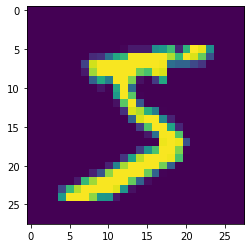

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=1)
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

BatchNormalization(axis=1)
model.add(Convolution2D(64, 3, 3, activation='relu'))
BatchNormalization(axis=1)
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

BatchNormalization()
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]


In [36]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [38]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.1323 - acc: 0.9588
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0464 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0341 - acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0267 - acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0233 - acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0184 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0170 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0159 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0137 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.01

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [40]:
print(score)

[0.02310829902064188, 0.9947]


In [0]:
y_pred = model.predict(X_test)

In [42]:
print(y_pred[:9])
print(y_test[:9])

[[2.00891681e-09 7.06870793e-08 4.52260338e-07 9.67861808e-08
  4.78431794e-10 1.92290461e-10 1.72088750e-11 9.99999046e-01
  1.69768988e-09 3.41220300e-07]
 [2.89891863e-13 8.91156107e-11 1.00000000e+00 4.34413763e-13
  1.26689848e-12 3.45329460e-18 7.31480779e-11 5.05557727e-13
  5.77433283e-13 4.20061172e-15]
 [1.50213748e-11 1.00000000e+00 5.62085829e-11 5.78016205e-13
  1.63453105e-11 3.54454605e-10 5.44104796e-11 2.82480261e-08
  1.49825319e-09 1.88304979e-11]
 [1.00000000e+00 4.27130174e-13 2.68145783e-11 3.56498956e-13
  4.98679743e-12 1.71562493e-12 5.21649701e-09 1.08744666e-10
  3.27723793e-10 2.26160118e-10]
 [2.02337939e-15 6.25539759e-11 1.31625776e-13 7.15536821e-19
  1.00000000e+00 1.04955183e-14 8.44436465e-11 1.92739594e-15
  3.24535320e-13 2.81322058e-12]
 [1.15896320e-11 1.00000000e+00 1.74054347e-11 7.49694716e-15
  2.36138583e-12 4.94451832e-12 1.58352509e-12 1.00573052e-08
  1.60057398e-10 8.71176395e-12]
 [1.20719625e-16 7.52022800e-09 5.83500425e-13 7.78324379e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

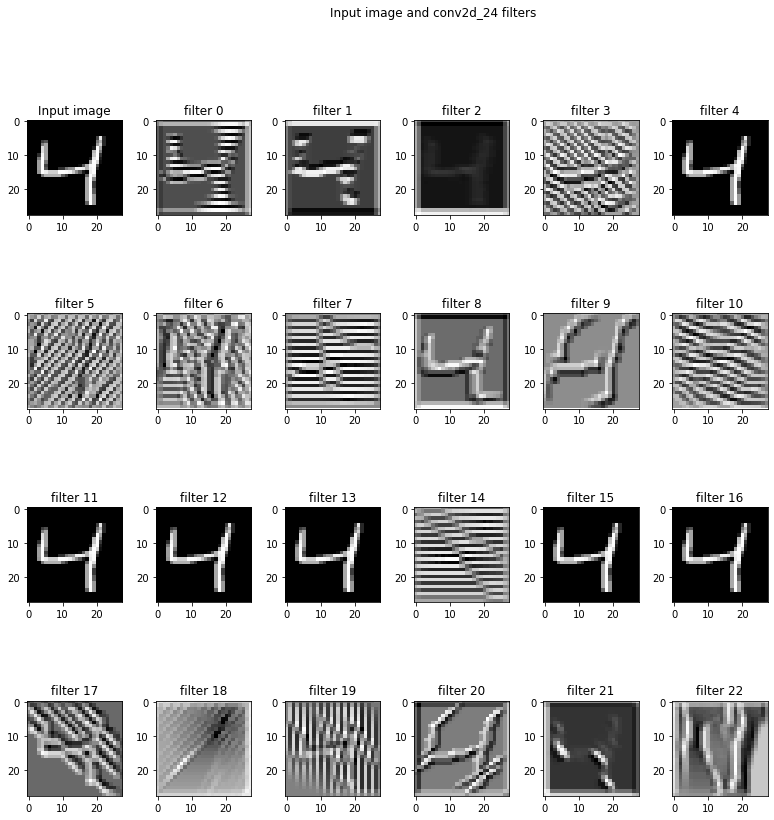

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_24'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()